In [17]:
%pip install pandas
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt


In [18]:
def infer_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "DECIMAL(10, 2)"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATE"
    elif pd.api.types.is_string_dtype(dtype):
        return "VARCHAR(255)"
    else:
        return "VARCHAR(255)"       

In [19]:
def generate_dimension_table_sql(table_name, df):
    columns_sql = ",\n  ".join([f"{col} {infer_sql_type(df[col].dtype)}" for col in df.columns])
    primary_key = df.columns[0]
    sql = f"CREATE TABLE {table_name} (\n  {columns_sql},\n  PRIMARY KEY ({primary_key})\n);\n"
    return sql

In [20]:
def generate_fact_table_sql(table_name, df):
    columns_sql = ",\n  ".join([f"{col} {infer_sql_type(df[col].dtype)}" for col in df.columns])
    primary_key = df.columns[0]
    sql = f"CREATE TABLE {table_name} (\n  {columns_sql},\n  PRIMARY KEY ({primary_key})\n);\n"
    return sql


In [21]:
Patient_Dimension = pd.DataFrame({
    'Patient_ID': [1, 2, 3, 4, 5],
    'Patient_Name': ['John Doe', 'Jane Smith', 'Michael Johnson', 'Emily Davis', 'David Wilson'],
    'Address': ['123 Maple St', '456 Oak Ave', '789 Pine Blvd', '321 Cedar Ln', '654 Birch Dr'],
    'City': ['Los Angeles', 'New York', 'Chicago', 'Houston', 'Miami'],
    'State': ['California', 'New York', 'Illinois', 'Texas', 'Florida'],
    'Country': ['USA']*5,
    'Email': ['john.doe@example.com', 'jane.smith@example.com', 'michael.j@example.com', 'emily.d@example.com', 'david.w@example.com'],
    'Phone_Number': ['555-123-4567', '555-234-5678', '555-345-6789', '555-456-7890', '555-567-8901'],
    'Date_Of_Birth': ['1980-01-15', '1975-02-20', '1985-03-25', '1990-04-30', '1982-05-10'],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Insurance_ID': ['INS123456', 'INS234567', 'INS345678', 'INS456789', 'INS567890'],
    'Primary_Physician': ['Dr. Alice Smith', 'Dr. Bob Brown', 'Dr. Carol White', 'Dr. David Green', 'Dr. Eve Black'],
    'Date_Of_Registration': ['2023-01-10', '2023-02-15', '2023-03-18', '2023-04-22', '2023-05-25']
})

In [22]:
Physician_Dimension = pd.DataFrame({
    'Physician_ID': [1, 2, 3, 4, 5],
    'Physician_Name': ['Dr. Alice Smith', 'Dr. Bob Brown', 'Dr. Carol White', 'Dr. David Green', 'Dr. Eve Black'],
    'Specialty': ['General Medicine', 'Cardiology', 'Orthopedics', 'Neurology', 'Dermatology'],
    'Phone_Number': ['555-111-2222', '555-222-3333', '555-333-4444', '555-444-5555', '555-555-6666'],
    'Email': ['alice.smith@hospital.com', 'bob.brown@hospital.com', 'carol.white@hospital.com', 'david.green@hospital.com', 'eve.black@hospital.com']
})


In [23]:
Date_Dimension = pd.DataFrame({
    'Date_ID': [1, 2, 3, 4, 5],
    'Date': ['2023-01-10', '2023-02-15', '2023-03-18', '2023-04-22', '2023-05-25'],
    'Day': [10, 15, 18, 22, 25],
    'Month': [1, 2, 3, 4, 5],
    'Quarter': [1, 1, 1, 2, 2],
    'Year': [2023, 2023, 2023, 2023, 2023]
})

In [24]:
Department_Dimension = pd.DataFrame({
    'Department_ID': [1, 2, 3, 4, 5],
    'Department_Name': ['General Medicine', 'Cardiology', 'Orthopedics', 'Neurology', 'Dermatology'],
    'Location': ['Building A', 'Building B', 'Building C', 'Building D', 'Building E']
})

In [25]:

Diagnosis_Dimension = pd.DataFrame({
    'Diagnosis_Code': ['D001', 'D002', 'D003', 'D004', 'D005'],
    'Diagnosis_Description': ['Flu', 'Hypertension', 'Fracture', 'Migraine', 'Acne']
})

In [26]:
Treatment_Dimension = pd.DataFrame({
    'Treatment_Code': ['T001', 'T002', 'T003', 'T004', 'T005'],
    'Treatment_Description': ['Antiviral Medication', 'Blood Pressure Medication', 'Casting', 'Pain Management', 'Topical Ointment']
})

In [27]:
Medical_Visit_Fact = pd.DataFrame({
    'Visit_ID': [1, 2, 3, 4, 5],
    'Patient_ID': [1, 2, 3, 4, 5],
    'Physician_ID': [1, 2, 3, 4, 5],
    'Date_ID': [1, 2, 3, 4, 5],
    'Department_ID': [1, 2, 3, 4, 5],
    'Visit_Type': ['Consultation', 'Follow-up', 'Surgery', 'Emergency', 'Check-up'],
    'Diagnosis_Code': ['D001', 'D002', 'D003', 'D004', 'D005'],
    'Treatment_Code': ['T001', 'T002', 'T003', 'T004', 'T005'],
    'Visit_Cost': [150.00, 200.00, 3000.00, 500.00, 120.00],
    'Insurance_Coverage': [100.00, 150.00, 2500.00, 400.00, 100.00]
})

In [28]:
schema_sql = ""
schema_sql += generate_fact_table_sql("Medical_Visit_Fact", Medical_Visit_Fact)
schema_sql += generate_dimension_table_sql("Patient_Dimension", Patient_Dimension)
schema_sql += generate_dimension_table_sql("Physician_Dimension", Physician_Dimension)
schema_sql += generate_dimension_table_sql("Date_Dimension", Date_Dimension)
schema_sql += generate_dimension_table_sql("Department_Dimension", Department_Dimension)
schema_sql += generate_dimension_table_sql("Diagnosis_Dimension", Diagnosis_Dimension)
schema_sql += generate_dimension_table_sql("Treatment_Dimension", Treatment_Dimension)

In [29]:
def create_snowflake_schema_visual(fact_table_name, dimension_tables):
    # Create a new directed graph
    dot = Digraph(comment='Snowflake Schema')

    # Add the fact table as the central node
    dot.node(fact_table_name, fact_table_name, shape='box', style='filled', color='lightblue')

    # Add the dimension tables as nodes and connect them to the fact table
    for dimension_name in dimension_tables:
        dot.node(dimension_name, dimension_name, shape='ellipse', style='filled', color='lightgreen')
        dot.edge(dimension_name, fact_table_name)

    # Render the graph to a file
    dot.render('snowflake_schema', format='png', cleanup=True)
    return dot

In [30]:
fact_table_name = "Medical_Visit_Fact"
dimension_tables = {
    "Patient_Dimension": Patient_Dimension,
    "Physician_Dimension": Physician_Dimension,
    "Date_Dimension": Date_Dimension,
    "Department_Dimension": Department_Dimension,
    "Diagnosis_Dimension": Diagnosis_Dimension,
    "Treatment_Dimension": Treatment_Dimension
}

In [31]:
def create_star_schema_visual():
    # Define the fact table and dimension tables
    fact_table_name = "Medical_Visit_Fact"
    dimension_tables = {
        "Patient_Dimension": ['Patient_ID', 'Patient_Name', 'Address', 'City', 'State', 'Country', 'Email', 'Phone_Number', 'Date_Of_Birth', 'Gender', 'Insurance_ID', 'Primary_Physician', 'Date_Of_Registration'],
        "Physician_Dimension": ['Physician_ID', 'Physician_Name', 'Specialty', 'Phone_Number', 'Email'],
        "Date_Dimension": ['Date_ID', 'Date', 'Day', 'Month', 'Quarter', 'Year'],
        "Department_Dimension": ['Department_ID', 'Department_Name', 'Location'],
        "Diagnosis_Dimension": ['Diagnosis_Code', 'Diagnosis_Description'],
        "Treatment_Dimension": ['Treatment_Code', 'Treatment_Description'],
    }

    # Initialize the graph
    G = nx.Graph()

    # Add the fact table node
    G.add_node(fact_table_name, color='red')

    # Add the dimension tables and edges
    for dimension_name, attributes in dimension_tables.items():
        G.add_node(dimension_name, color='blue')
        G.add_edge(dimension_name, fact_table_name)

        # Optionally, add the dimension table attributes as separate nodes
        for attribute in attributes:
            G.add_node(attribute, color='green')
            G.add_edge(dimension_name, attribute)

    # Draw the graph
    pos = nx.spring_layout(G, k=0.05, iterations=500000)  # Fixed layout for reproducibility

    # Draw nodes with rectangle shape
    node_shapes = ['s']  # 's' is used for squares (rectangles)
    for shape in node_shapes:
        nx.draw_networkx_nodes(G, pos, nodelist=[fact_table_name], node_shape=shape, node_color='red', node_size=3000)
        nx.draw_networkx_nodes(G, pos, nodelist=dimension_tables.keys(), node_shape=shape, node_color='blue', node_size=3000)
        nx.draw_networkx_nodes(G, pos, nodelist=[attribute for attributes in dimension_tables.values() for attribute in attributes], node_shape=shape, node_color='green', node_size=2000)

    # Draw edges and labels
    # Adjust as needed
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=6, font_color='black', font_weight='light')

    plt.title('Star Schema Visualization')
    plt.show()

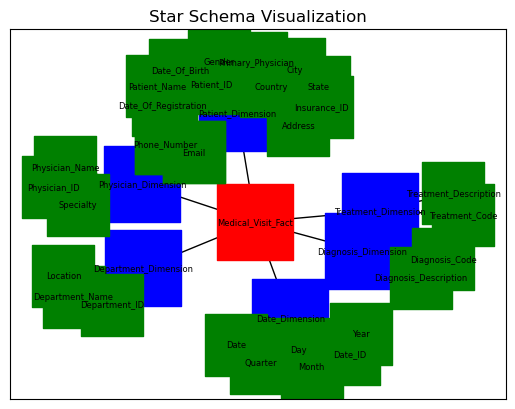

In [32]:
create_star_schema_visual()